# 入门｜深度学习实战1：使用Keras构建分类MLP（Kaggle-MNIST数据集）

MNIST数据集来自美国国家标准与技术研究所收集的来自250个人的手写阿拉伯数字，对深度学习的地位相当于编程语言的HelloWorld，作为入门训练非常合适。

所以正好拿来练手神经网络。

因为是很常见的数据集，所以已经被包含在了许多机器学习库中，直接调用就行，但反正是练手就顺便做一下Kaggle，这次用的是Kaggle的MNIST。

比赛链接：https://www.kaggle.com/c/digit-recognizer/overview

原数据集是60000张28*28共784像素灰度图片的数据，每个像素有一个灰度数值0～255，数值越高颜色越深，这里已经划分成42000条的训练集，我们要预测的是测试集的28000条。

训练集有785列，第1列为标签0～9代表数字，测试集只有784列。

首先又是一个分类任务，这次是多分类（0～9），尝试用神经网络解决问题，意味着神经网络接受784个输入神经元，10个输出神经元。

In [1]:
# 所用到的库（去掉注释可安装）
# !conda install matplotlib numpy pandas scikit-learn
# !pip install tensorflow

In [2]:
# 读取csv及提供数据分析方法
import pandas as pd
# 借助sklearn的StratifiedShuffleSplit进行分层抽样
from sklearn.model_selection import StratifiedShuffleSplit
# 导入keras
from tensorflow import keras
import numpy as np

## 数据准备

In [3]:
# 读取训练集
data = pd.read_csv('train.csv')

In [4]:
# 大概看一下
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

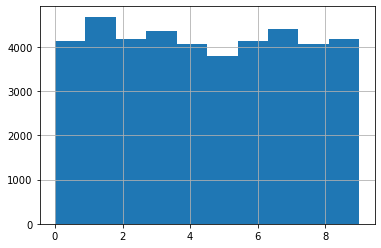

In [5]:
# 查看样本分布
data['label'].hist()

发现样本分布是不均的，所以创建验证集时候最好分层抽样。

In [6]:
# 使用StratifiedShuffleSplit类进行分层抽样
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

# 按label属性进行划分并生成训练集和验证集
for train_index, valid_index in split.split(data, data['label']):
    train = data.loc[train_index]
    valid = data.loc[valid_index]

# 查看验证集的比例分布以检查是否如我们所料
valid['label'].value_counts() / len(valid)

1    0.111429
7    0.104762
3    0.103571
9    0.099762
2    0.099524
6    0.098571
0    0.098333
4    0.096905
8    0.096667
5    0.090476
Name: label, dtype: float64

In [7]:
# 划分样本与标签
train_X = train.drop(['label'], axis=1)
train_Y = train['label']

# 验证集也划分一下
valid_X = valid.drop(['label'], axis=1)
valid_Y = valid['label']

## 模型训练

这里用的是最简单的顺序模型，第一层为输入层，设置input_shape为784。

第二到七层为隐藏层，Dense是全连接层，使用relu作为激活函数。

第八层为输出层，10个神经元对应10个标签进行输出，使用softmax作为激活函数，因为这里的每一个输出都是排它的，softmax为归一化指数函数，它能凸显原始向量中最大的值并抑制远低于最大值的其它分量。

In [8]:
# 构建模型
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[784]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(900, activation='relu'),
    keras.layers.Dense(1200, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2022-01-19 21:42:47.004612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 21:42:47.008455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 21:42:47.008897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 21:42:47.009705: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
# 编译模型
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.0001),
    metrics=['accuracy']
)

In [10]:
history = model.fit(train_X, train_Y, epochs=29,
                    validation_data=(valid_X, valid_Y))

Epoch 1/29
 145/1182 [==>...........................] - ETA: 1s - loss: 3.6352 - accuracy: 0.5192

2022-01-19 21:42:48.125946: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1182/1182 [==============================] - 2s 1ms/step - loss: 1.2219 - accuracy: 0.7667 - val_loss: 0.6152 - val_accuracy: 0.8498
Epoch 2/29
1182/1182 [==============================] - 1s 1ms/step - loss: 0.4454 - accuracy: 0.8815 - val_loss: 0.4396 - val_accuracy: 0.8833
Epoch 3/29
1182/1182 [==============================] - 1s 1ms/step - loss: 0.3184 - accuracy: 0.9103 - val_loss: 0.3808 - val_accuracy: 0.8981
Epoch 4/29
1182/1182 [==============================] - 1s 1ms/step - loss: 0.2479 - accuracy: 0.9284 - val_loss: 0.3434 - val_accuracy: 0.9098
Epoch 5/29
1182/1182 [==============================] - 1s 1ms/step - loss: 0.2016 - accuracy: 0.9416 - val_loss: 0.3448 - val_accuracy: 0.9098
Epoch 6/29
1182/1182 [==============================] - 1s 1ms/step - loss: 0.1691 - accuracy: 0.9510 - val_loss: 0.3163 - val_accuracy: 0.9162
Epoch 7/29
1182/1182 [==============================] - 1s 1ms/step - loss: 0.1432 - accuracy: 0.9587 - val_loss: 0.3042 - val_accuracy: 0.9181
Epo

In [11]:
# 读取测试集
test = pd.read_csv('test.csv')

# 进行预测
results = model.predict(test)

In [12]:
# 转换格式
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')

# 生成预测文件
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), results],
                       axis=1)
submission.to_csv('submission.csv', index=False)

## 提交结果

第一次是2个隐藏层（300x100），学习率0.001，训练29轮，最终提交准确率0.94942。

第二次加了4层，总共300x600x900x1200x300x100，学习率和轮次不变，最终0.95835，排名1515。

## 总结

层数、神经元、学习率、轮次等等超参还有很多可以调整的地方，还有batch size在这没有调用的都是默认设置。

这次问题主要出在过拟合，其实应该绘制学习曲线来帮忙找到最合适的超参，作为第一次尝试先到这，MLP能到95%准确率可能也差不多了。